In [3]:
from pathlib import Path
import sys
sys.path.insert(1, str(Path.cwd().parent))
from tensor_hero.visualization import slice_notes, plot_chart
import numpy as np
import pandas as pd 

In [4]:

charts_path = Path(r'C:\Users\cheny\OneDrive\Desktop\jackie_charts\blink-182 - Generational Divide')
expert = np.load(charts_path / 'Expert_simplified.npy')
hard = np.load(charts_path / 'Hard_simplified.npy')
medium = np.load(charts_path / 'Medium_simplified.npy')
easy = np.load(charts_path / 'Easy_simplified.npy')

In [7]:
len(expert)

5050

In [9]:
len(easy)

5050

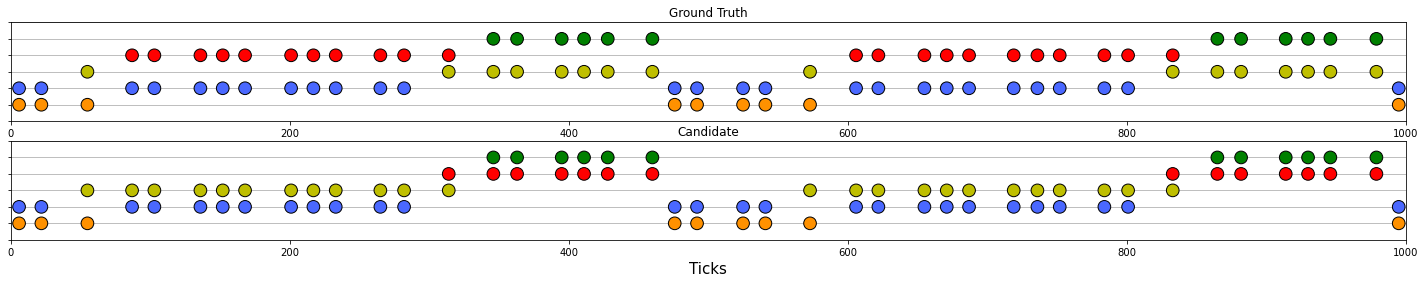

In [14]:

_ = plot_chart(slice_notes(expert,12,22), slice_notes(hard,12,22))

Easy level: the orange(5) & the blue (4) is out. 
- G1, R2, Y3, GR6,GY7,RY10

Medium level: the orange(5) is out 

Hard: less chord

In [58]:
#distribution of keys in expert songs
uniques, counts = np.unique(expert, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(expert)))
percentages

{0.0: 96.51485148514851,
 1.0: 0.0594059405940594,
 2.0: 0.07920792079207921,
 3.0: 0.019801980198019802,
 4.0: 0.019801980198019802,
 5.0: 0.019801980198019802,
 6.0: 0.4158415841584158,
 7.0: 0.8514851485148515,
 10.0: 0.07920792079207921,
 11.0: 1.188118811881188,
 14.0: 0.15841584158415842,
 15.0: 0.594059405940594}

In [33]:
# distribution of different keys in easy songs
uniques, counts = np.unique(easy, return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(easy)))
percentages

{0.0: 97.92079207920793,
 1.0: 0.5148514851485149,
 2.0: 0.49504950495049505,
 3.0: 1.0495049504950495,
 7.0: 0.019801980198019802}

Notes Pattern Conversion

In [7]:
# 15(OB) - 3
# 11(RB) - 3 
# ANYTHING WITH B CAN BE 3 
## 8 (GB)
## 13(YB)
## 17 (GRB)
## 19 (GYB)
## 22(RYB)

# 14(OY) - 2
# 10(RY) - 2
# 7(GY) - 2
# ANYTHING WITH Y CAN BE 2
# 10(RY) - 7(GY)

# 6(GR) - 1
# 7(GY) - 1
#ANYTHING WITH G CAN BE 1


#7 is also simple 



All easy notes are present in the expert songs

In [8]:
#same notes of the easy songs
print(np.intersect1d(idx_easy, idx_expert))

NameError: name 'idx_easy' is not defined

In [ ]:
np.in1d(np.intersect1d(idx_easy, idx_expert),idx_easy)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
# easy song has len of 105, almost the same as the intersection len
len(np.intersect1d(idx_easy, idx_expert))

104

In [ ]:
#the intervals between expert songs 
np.diff(idx_expert)

array([[ 16,  33,  16,  16,  33,  16,  16,  33,  16,  32,  33,  16,  32,
         16,  17,  32,  16,  17,  32,  16,  33,  16,  16,  16,  33,  16,
         16,  33,  16,  16,  32,  17,  32,  49,  32,  16,  17,  32,  16,
         16,  33,  16,  33,  32,  16,  33,  16,  16,  33,  16,  16,  32,
         17,  32,  32,  17,  32,  16,  17,  32,  16,  16,  33,  16,  32,
         33,  16,  33,  16,  16,  32,  17,  16,  32,  17,  32,  32,  17,
         32,  16,  16,  33,  16,  16,  33,  16,  32,  49,  32,  17,  16,
         32,  17,  16,  32,  16,  17,  32,  16,  17,  32,  16,  16,  33,
         16,  16,  33,  16,  32,  33,  16,  32,  17,  16,  32,  16,  17,
         32,  16,  17,  32,  16,  16,  33,  16,  16,  33,  32,  33,  16,
         32,  33,  16,  32,  17,  16,   8,  40,  17,  32,  16,  65,  16,
         33,  16,  65,  16,  33,  16,  32,  33,  16,  32,  16,  17,   8,
         40,  25,  24,  32,  17,  32,  16,  33,  16,  65,  32,  33,  32,
         33, 616,   8,   8,   8,   8]], dtype=int64

In [ ]:
# the intervals between easy songs 
np.diff(idx_easy)

array([[ 49,  32,  33,  32,  49,  32,  33,  48,  33,  48,  65,  33,  32,
         49,  32,  33,  32,  49,  32,  33,  48,  33,  48,  65,  33,  32,
         49,  32,  33,  32,  49,  32,  32,  49,  33,  48,  65,  32,  33,
         49,  32,  32,  33,  49,  32,  32,  49,  32,  49,  65,  32,  81,
         33,  49,  48,  33,  48,  49,  32,  49,  65,  32,  33,  48,  33,
         48,  49,  33,  48,  49,  32, 114,  32,  33,  48,  17,  64,  49,
         16,  65,  49,  16,  65,  49,  16,  32,  33,  48,  16,  65,  25,
         24,  32,  17,  32,  49,  16,  65,  32,  33,  32,  33, 616,  32]],
      dtype=int64)

In [12]:

df_exp = pd.DataFrame(expert,columns= ['expert_note'])
df_easy = pd.DataFrame(hard,columns= ['easy_note'])
df_train = df_exp.join(df_easy)
df_train['Shown'] = (df_train['expert_note'] != 0.0) & (df_train["easy_note"] != 0.0)
df_full = df_train.loc[df_train['expert_note'] != 0.0]
df_full.head(30)

,expert_note,easy_note,Shown
249,11.0,13.0,True
265,11.0,13.0,True
298,11.0,13.0,True
314,11.0,13.0,True
330,11.0,13.0,True
363,11.0,13.0,True
379,11.0,13.0,True
395,11.0,13.0,True
428,11.0,13.0,True
444,11.0,13.0,True


In [ ]:
df_full['Prev'] = df_full.Shown.shift(1)
df_full.head()

In [ ]:
#
df_full.loc[249, 'Prev'] = False
df_full["Shown"] = df_full["Shown"].astype(int)
df_full["Prev"] = df_full["Prev"].astype(int)
df_full.head(10)

Curate Full Dataset

In [74]:
from pathlib import Path
import os
import pandas as pd

expert_chart_paths = []
exp_note = []

root_dir = Path(r"C:\Users\cheny\OneDrive\Desktop\jackie_charts")
for song_dir in [root_dir / x for x in os.listdir(root_dir)]:
    expert_chart_paths.append(song_dir / 'Expert_simplified.npy')


for i in range(1, len(expert_chart_paths)):
    exp_note = np.concatenate([np.load(expert_chart_paths[0]), np.load(expert_chart_paths[i])])

In [75]:
easy_chart_paths = []
easy_note = []

for song_dir in [root_dir / x for x in os.listdir(root_dir)]:
    easy_chart_paths.append(song_dir / 'Easy_simplified.npy')

for i in range(1, len(easy_chart_paths)):
    easy_note = np.concatenate([np.load(easy_chart_paths[0]), np.load(easy_chart_paths[i])])

In [110]:
med_chart_paths = []
med_note = []

for song_dir in [root_dir / x for x in os.listdir(root_dir)]:
    med_chart_paths.append(song_dir / 'Medium_simplified.npy')

for i in range(1, len(med_chart_paths)):
    med_note = np.concatenate([np.load(med_chart_paths[0]), np.load(med_chart_paths[i])])

In [111]:
hard_chart_paths = []
hard_note = []

for song_dir in [root_dir / x for x in os.listdir(root_dir)]:
    hard_chart_paths.append(song_dir / 'Hard_simplified.npy')

for i in range(1, len(hard_chart_paths)):
    hard_note = np.concatenate([np.load(hard_chart_paths[0]), np.load(hard_chart_paths[i])])

In [112]:
df = pd.DataFrame(list(zip(exp_note, hard_note, med_note, easy_note)), columns =['exp', 'hard', 'med','easy']) 
df

,exp,hard,med,easy
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
57025,0.0,0.0,0.0,0.0
57026,0.0,0.0,0.0,0.0
57027,0.0,0.0,0.0,0.0
57028,0.0,0.0,0.0,0.0


In [113]:
full_array = np.asarray(list(zip(exp_note, hard_note , med_note, easy_note)))
# save to npy file
np.save('full_array.npy', full_array)

In [32]:
full_array = np.load('full_array.npy')
#train_array

df = pd.DataFrame(full_array, columns =['exp', 'hard', 'med','easy'] )
df

,exp,hard,med,easy
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
57025,0.0,0.0,0.0,0.0
57026,0.0,0.0,0.0,0.0
57027,0.0,0.0,0.0,0.0
57028,0.0,0.0,0.0,0.0


In [34]:
df_train = df.loc[df['exp'] != 0.0]
df_train['index'] = df_train.index
df_train

<ipython-input-34-f3e4e58ed781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['index'] = df_train.index


,exp,hard,med,easy,index
180,218.0,1.0,0.0,0.0,180
274,218.0,1.0,0.0,0.0,274
299,218.0,1.0,6.0,1.0,299
7249,1.0,1.0,1.0,1.0,7249
7349,218.0,1.0,1.0,0.0,7349
...,...,...,...,...,...
56679,4.0,4.0,3.0,2.0,56679
56799,3.0,3.0,2.0,2.0,56799
56859,2.0,2.0,1.0,1.0,56859
56919,4.0,4.0,3.0,2.0,56919


In [115]:
train_array = df_train.to_numpy()
# save to npy file
np.save('train_array.npy', train_array)

In [117]:
# distribution of different keys in med songs
uniques, counts = np.unique(df_train['hard'], return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(df_train)))
percentages

{0.0: 32.83898305084746,
 1.0: 5.155367231638418,
 2.0: 12.641242937853107,
 3.0: 15.18361581920904,
 4.0: 12.005649717514125,
 5.0: 7.768361581920904,
 6.0: 3.672316384180791,
 7.0: 3.531073446327684,
 10.0: 3.1779661016949152,
 11.0: 1.271186440677966,
 13.0: 1.5536723163841808,
 14.0: 0.4943502824858757,
 15.0: 0.2824858757062147,
 16.0: 0.3531073446327684,
 22.0: 0.07062146892655367}

In [118]:
# distribution of different keys in med songs
uniques, counts = np.unique(df_train['med'], return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(df_train)))
percentages

{0.0: 44.067796610169495,
 1.0: 12.641242937853107,
 2.0: 15.889830508474576,
 3.0: 11.935028248587571,
 4.0: 10.028248587570621,
 6.0: 2.542372881355932,
 7.0: 0.4943502824858757,
 10.0: 1.4124293785310735,
 13.0: 0.635593220338983,
 16.0: 0.3531073446327684}

In [119]:
# distribution of different keys in easy songs
uniques, counts = np.unique(df_train['easy'], return_counts=True)
percentages = dict(zip(uniques, counts * 100 / len(df_train)))
percentages

{0.0: 55.155367231638415,
 1.0: 16.242937853107346,
 2.0: 16.10169491525424,
 3.0: 11.935028248587571,
 4.0: 0.07062146892655367,
 7.0: 0.3531073446327684,
 10.0: 0.14124293785310735}

In [122]:
df_train['all_shown'] = (df_train['hard'] != 0.0) & (df_train['med'] != 0.0) & (df_train["easy"] != 0.0)
df_train

<ipython-input-122-d1bfd241e2ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['all_shown'] = (df_train['hard'] != 0.0) & (df_train['med'] != 0.0) & (df_train["easy"] != 0.0)


,exp,hard,med,easy,all_shown
180,218.0,1.0,0.0,0.0,False
274,218.0,1.0,0.0,0.0,False
299,218.0,1.0,6.0,1.0,True
7249,1.0,1.0,1.0,1.0,True
7349,218.0,1.0,1.0,0.0,False
...,...,...,...,...,...
56679,4.0,4.0,3.0,2.0,True
56799,3.0,3.0,2.0,2.0,True
56859,2.0,2.0,1.0,1.0,True
56919,4.0,4.0,3.0,2.0,True


In [68]:
df_train_1 = df_train[['index', 'exp', 'hard']]
df_train_1

,index,exp,hard
180,180,218.0,1.0
274,274,218.0,1.0
299,299,218.0,1.0
7249,7249,1.0,1.0
7349,7349,218.0,1.0
...,...,...,...
56679,56679,4.0,4.0
56799,56799,3.0,3.0
56859,56859,2.0,2.0
56919,56919,4.0,4.0


In [45]:
d1 = df_train.loc[df_train['exp']== 218.0]
d1


,exp,hard,med,easy,index
180,218.0,1.0,0.0,0.0,180
274,218.0,1.0,0.0,0.0,274
299,218.0,1.0,6.0,1.0,299
7349,218.0,1.0,1.0,0.0,7349
38657,218.0,1.0,0.0,0.0,38657
38667,218.0,0.0,0.0,0.0,38667
42497,218.0,1.0,0.0,0.0,42497
42507,218.0,0.0,0.0,0.0,42507


In [69]:
df_train_1.loc[df_train_1['exp']== 1.0]

,index,exp,hard
7249,7249,1.0,1.0
25749,25749,1.0,1.0
25774,25774,1.0,0.0
25899,25899,1.0,2.0
26299,26299,1.0,1.0
...,...,...,...
52749,52749,1.0,2.0
52824,52824,1.0,0.0
52869,52869,1.0,2.0
54529,54529,1.0,0.0


In [ ]:
uniques, counts = np.unique(d1['hard'], return_counts=True) 

In [64]:
np.array(list(dict(zip(uniques, counts / len(d1))).items()))

array([[0.  , 0.25],
       [1.  , 0.75]])

In [65]:
exp_uniques, counts = np.unique(df_train['exp'], return_counts=True)
exp_uniques
#counts

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,  10.,  11.,  13.,  14.,
        15.,  16.,  17.,  19.,  22.,  23.,  24.,  26., 218.])